In [24]:
import quantstats as qs
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.colors import LinearSegmentedColormap
from quantstats.stats import *
from quantstats._plotting.wrappers import distribution
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import df2img
from datetime import date
from datetime import datetime

# my imports
import sys
sys.path.insert(1, '../scripts')
import utils as utl
import html_evaluation_portfolio as hep
import volatility_estimator as ve
import mean_rev_utl as mru

## Importing and processing data

In [43]:
short = 20
long = 80
list_securities = ['SSO', 'TLT']
debug_xl = False

In [56]:
#main
data = hep.create_dataframe_polygon(list_securities, start_date = '2017-09-01' , end_date = '2020-01-01')
unique_name = 'MATS'
for i in list_securities:
        unique_name += '_' + i
unique_name = unique_name + '_short_' + str(short) + '_long_'+ str(long)

In [57]:
signal_df = mru.create_mean_rev_signal(data, long, short)[0]
df_rolling_mean = mru.create_mean_rev_signal(data, long, short)[1]
data_r = data.div(data.shift(1))-1 #returns of securities

data_earnings = hep.df_earnings(signal_df, data_r) #compute the earnings 
data_earnings.dropna(inplace = True)

In [59]:
data_earnings
df_rolling_mean.dropna()

,SSO_long,SSO_short,TLT_long,TLT_short
timestamp,,,,
2017-12-26 00:00:00-05:00,25.271750,26.974250,125.774125,126.3310
2017-12-27 00:00:00-05:00,25.322375,27.028875,125.774375,126.3300
2017-12-28 00:00:00-05:00,25.378594,27.089500,125.748125,126.3860
2017-12-29 00:00:00-05:00,25.430625,27.119125,125.734250,126.4730
2018-01-02 00:00:00-05:00,25.487344,27.172500,125.686875,126.4200
...,...,...,...,...
2019-12-24 00:00:00-05:00,33.730375,36.205625,140.012250,138.5440
2019-12-26 00:00:00-05:00,33.822063,36.317125,139.886750,138.3460
2019-12-27 00:00:00-05:00,33.905094,36.412500,139.760375,138.1760


## Exploring the result

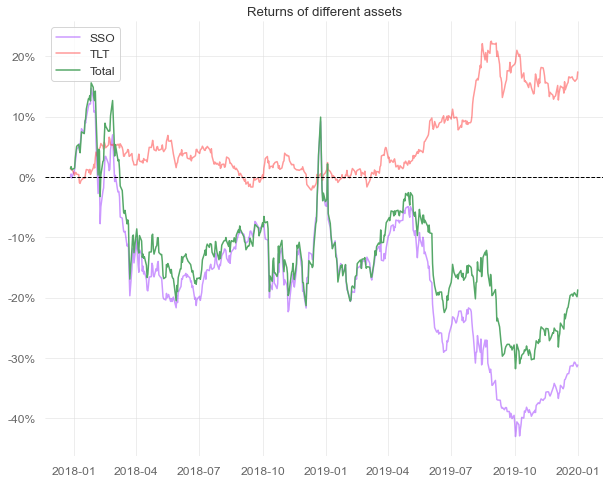

In [61]:
from quantstats.stats import compsum
from quantstats._plotting.core import format_pct_axis
from matplotlib.ticker import (
    FormatStrFormatter as _FormatStrFormatter,
    FuncFormatter as _FuncFormatter
)
from matplotlib.pyplot import cm


#returns = dict_df['x1 leverage']['Tot']
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Returns of different assets')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
color = cm.rainbow(np.linspace(0, 1, len(list_securities)))
for i,c in zip(list_securities,color):
    ax.plot(compsum(data_earnings[i]), lw=1.5, label=i, color=c, alpha=0.4)
ax.plot(compsum(data_earnings['Tot']), lw=1.5, label='Total', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()
fig = ax.get_figure()
fig.set_size_inches(10,8)
fig_title = 'return_different_asset_'
for i in list_securities:
        fig_title += '_' + i
fig.savefig('../img/' + fig_title + '.png')

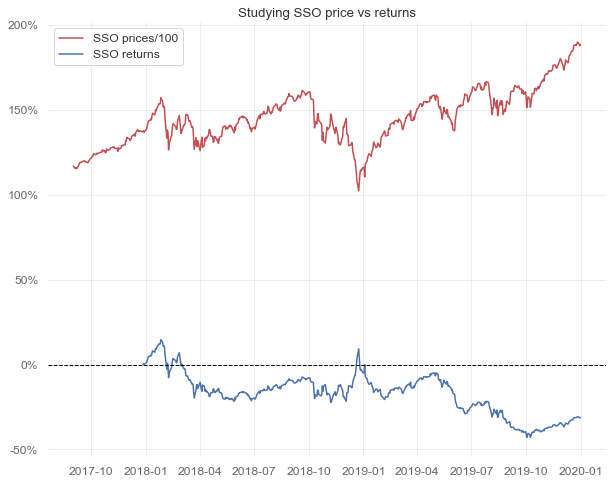

In [62]:
sec = 'SSO'
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Studying ' + sec + ' price vs returns')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(data[sec]* 0.05, lw=1.5, label=sec + ' prices/100', color='r', alpha=1) 
ax.plot(compsum(data_earnings[sec]), lw=1.5, label= sec + ' returns', color='b', alpha=1)
#ax.plot(compsum(data_earnings['Tot']), lw=1.5, label='Total', color='g', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()
fig = ax.get_figure()
fig.set_size_inches(10,8)
fig.savefig('../img/'+ sec + '_price_vs_returns_mr_startegy.png')

In [ ]:
#fig, ax = plt.subplots(figsize=(12,8))
#ax.set_title('Studying SSO price vs returns')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
#fig.set_facecolor('white')
#ax.set_facecolor('white')
#ax.plot(data['SSO']* 0.05, lw=1.5, label='SSO prices/100', color='r', alpha=1) 
#ax.plot(compsum(data_earnings['SSO']), lw=1.5, label='SSO returns', color='b', alpha=1)
##ax.plot(compsum(data_earnings['Tot']), lw=1.5, label='Total', color='g', alpha=1)
#ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
#ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
#ax.legend()
#fig = ax.get_figure()
#fig.set_size_inches(10,8)
#
#
##ax.axhline(threshold, color='green', lw=2, alpha=0.7)
#ax.fill_between(data['SSO'][79:]* 0.05,2, where= signal_df['SSO'] == 1 ,
#                color='green', alpha=0.2, transform=ax.get_xaxis_transform())
##fig.savefig('../img/SSO_price_vs_returns_mr_startegy.png')

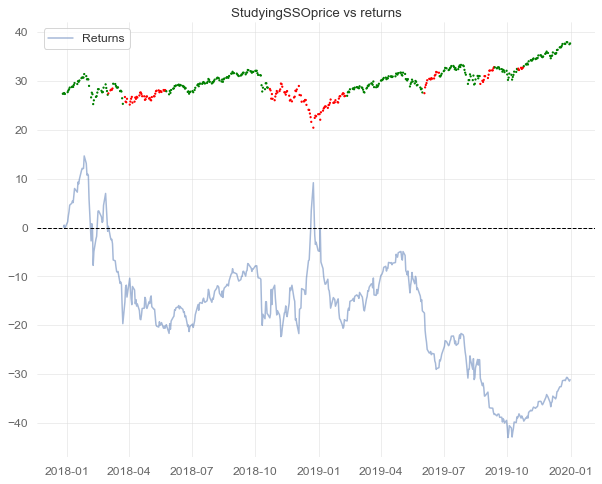

In [64]:
#data, signal_dfù
import matplotlib as mpl
sec = 'SSO'
data_scatter = data.copy()
#data_scatter['SSO_color'] = signal_df['SSO']
#data_scatter['TLT_color'] = signal_df['TLT']
data_scatter[sec +'_color'] = signal_df[sec]
data_scatter.dropna()

#plt.scatter(data_scatter.index, data_scatter['SSO'], c = data_scatter['SSO_color'], cmap = mpl.colors.ListedColormap(['red', 'green']), s = 1.5)

# Labelling 


fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Studying' + sec + 'price vs returns')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.scatter(data_scatter.index, data_scatter[sec], c = data_scatter[sec + '_color'], 
           cmap = mpl.colors.ListedColormap(['red', 'green']), s = 1.5)
ax.plot(compsum(data_earnings[sec])*100, lw=1.5, label='Returns', color='b', alpha=0.5)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
#ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()
fig = ax.get_figure()
fig.set_size_inches(10,8)
fig.savefig('../img/' + sec + '_price_vs_returns_mr_startegy.png')

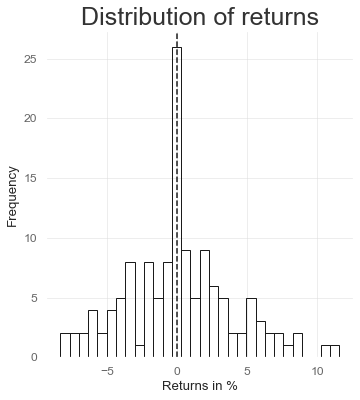

In [37]:
returns = monthly_returns(data_earnings[sec], eoy=False,compounded=True) * 100

series = pd.Series(dtype = 'float64')
for column in returns.columns:
    series = pd.concat([series,returns[column]])
#distribution(returns)
ax = series.plot.hist(bins = 30, edgecolor='k',fill=False)
ax.set_title('Distribution of returns', size = 25)
ax.axvline(0, color='k', linestyle='--')
ax.set_xlabel("Returns in %")
ax.set_ylabel("Frequency")
fig = ax.get_figure()
fig.set_size_inches(5.5,6)
fig.savefig('../img/temp/distribution_returns' + sec + '.png')
fig_distribution = fig

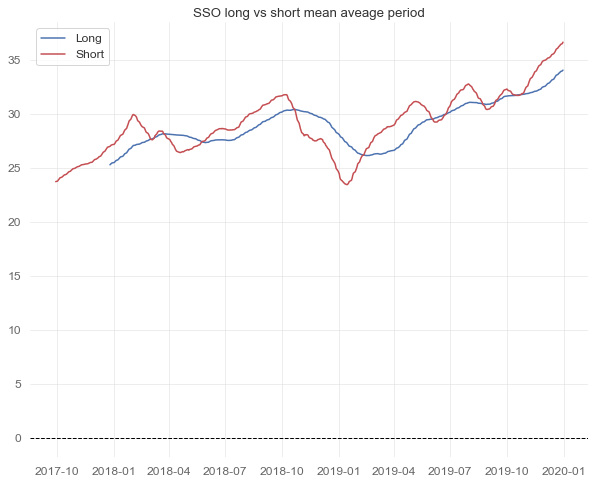

In [65]:
sec = 'SSO'
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title(sec + ' long vs short mean aveage period')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.plot(df_rolling_mean[sec + '_long'], lw=1.5, label='Long', color='b', alpha=1)
ax.plot(df_rolling_mean[sec + '_short'], lw=1.5, label='Short', color='r', alpha=1)
ax.axhline(0, ls="--", lw=1, color="#000000", zorder=2)
#ax.yaxis.set_major_formatter(_FuncFormatter(format_pct_axis))
ax.legend()
fig = ax.get_figure()
fig.set_size_inches(10,8)
fig.savefig('../img/'+ sec + '_long_' + str(long) + '_vs_short_' + str(short) + '_mr_startegy.png')